### P-Fuzzy System: Single Population

Population growth model using fuzzy rules.

**Discrete model:**
$$x_{n+1} = x_n + \Delta x$$

where $\Delta x$ is determined by fuzzy rules based on current population.

In [ ]:
# Install required packages for p-fuzzy dynamics simulation
!pip install pyfuzzy-toolbox matplotlib numpy -q

In [1]:
# Import p-fuzzy classes for discrete/continuous dynamics and Mamdani inference system
import fuzzy_systems as fs
from fuzzy_systems.dynamics import PFuzzyDiscrete, PFuzzyContinuous
from fuzzy_systems.inference import MamdaniSystem
import numpy as np
import matplotlib.pyplot as plt
print(fs.__version__)

Automatic parallelization (joblib)
1.0.7


In [2]:
# Create fuzzy system with population size as input and variation as output
# Rules model growth dynamics: low population grows fast, high population declines
fis = MamdaniSystem(name="Population Dynamics")

# Input: populatio size
fis.add_input('population_size', (0, 100))
fis.add_term('population_size','L','triangular',[0,0,25])
fis.add_term('population_size','ML','triangular',[0,25,50])
fis.add_term('population_size','M','triangular',[25,50,75])
fis.add_term('population_size','MH','triangular',[50,75,100])
fis.add_term('population_size','H','triangular',[75,100,100])

# Output: variation of population
fis.add_output('var_population', (-1, 4))
fis.add_term('var_population', 'NL', 'triangular', (-1, 0, 0))
fis.add_term('var_population', 'PL', 'triangular', (0, 0, 2))
fis.add_term('var_population', 'PM', 'triangular', (0, 2, 4))
fis.add_term('var_population', 'PH', 'triangular', (2, 4, 4))

# Rules (sintaxe de tupla plana)
fis.add_rules([
    ('L', 'PL'),
    ('ML', 'PM'),
    ('M', 'PH'),
    ('MH', 'PL'),
    ('H', 'NL'),
])


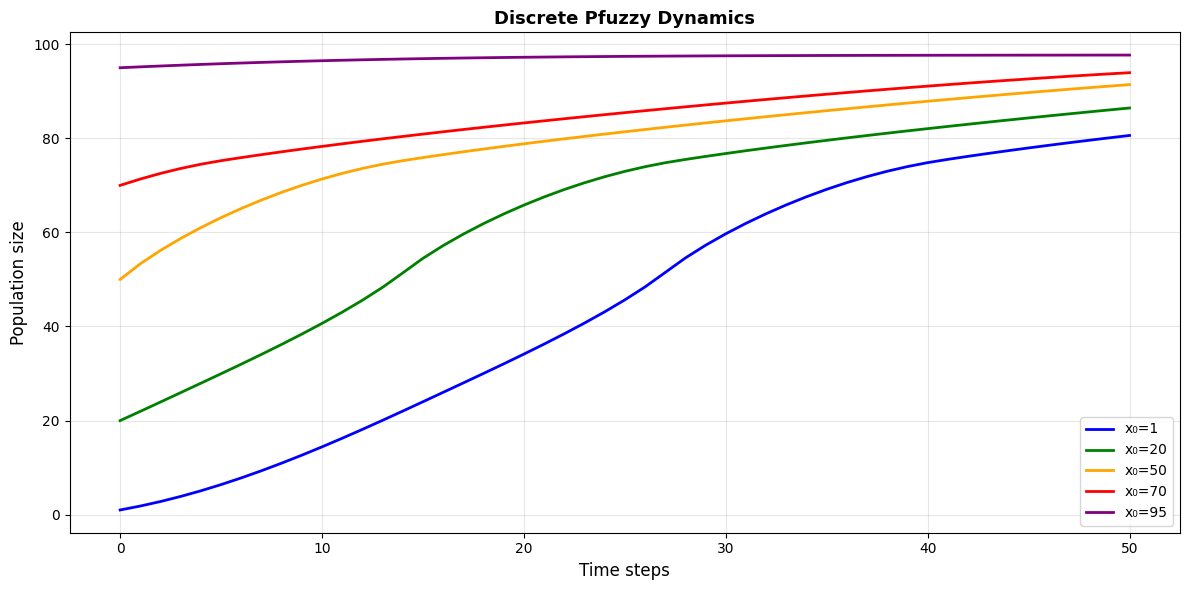

In [3]:
# Simulate discrete p-fuzzy dynamics with multiple initial conditions
# Mode 'absolute' uses fuzzy output directly: x_{n+1} = x_n + Δx
pfuzzy = PFuzzyDiscrete(fis=fis, mode='absolute')

# Several initial conditions
initial_conditions = [1, 20, 50, 70, 95]
colors = ['blue', 'green', 'orange', 'red', 'purple']

fig, ax = plt.subplots(figsize=(12, 6))

for x0, color in zip(initial_conditions, colors):
    t,traj = pfuzzy.simulate(x0={'population_size': x0}, n_steps=50)
    ax.plot(t, traj[:, 0], color=color, linewidth=2, label=f'x₀={x0}')

ax.set_xlabel('Time steps', fontsize=12)
ax.set_ylabel('Population size', fontsize=12)
ax.set_title('Discrete Pfuzzy Dynamics', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

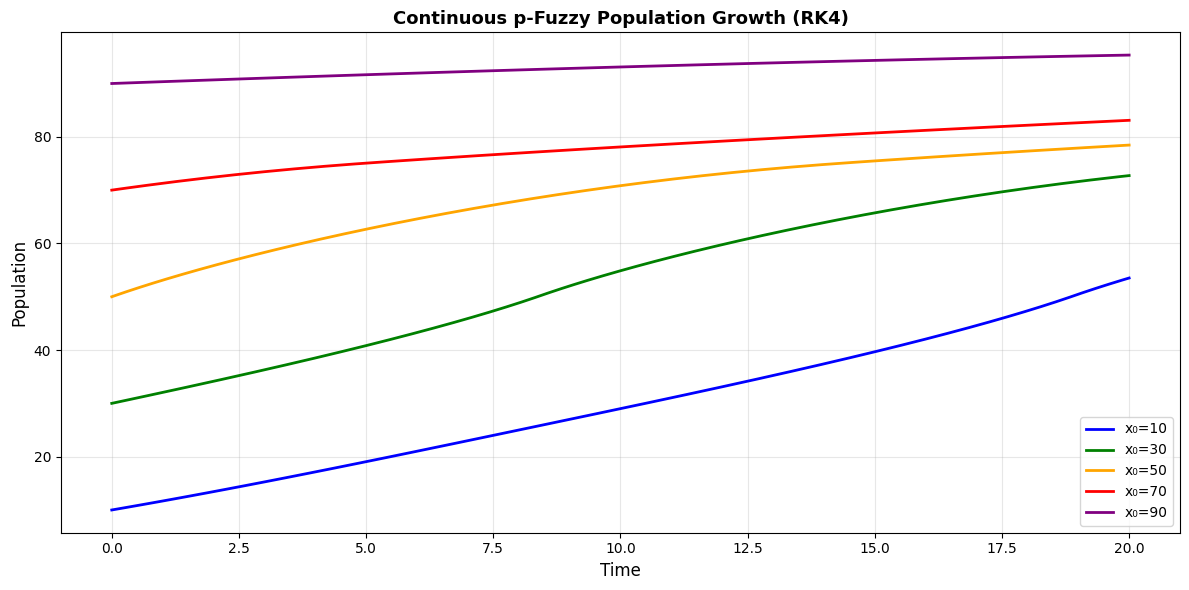

In [4]:
# Simulate continuous p-fuzzy dynamics using ODE solver (RK4 method)
# Adaptive step size for accurate integration of fuzzy differential equations
pfuzzy_cnt = PFuzzyContinuous(fis=fis, mode='absolute')

# Several initial conditions for continuous mode
initial_conditions = [10, 30, 50, 70, 90]
colors = ['blue', 'green', 'orange', 'red', 'purple']

fig, ax = plt.subplots(figsize=(12, 6))

for x0, color in zip(initial_conditions, colors):
    t,traj = pfuzzy_cnt.simulate(x0={'population_size': x0}, t_span=(0, 20), adaptive=True)
    ax.plot(t, traj[:, 0], color=color, linewidth=2, label=f'x₀={x0}')

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Population', fontsize=12)
ax.set_title('Continuous p-Fuzzy Population Growth (RK4)', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Custom dynamics

In [9]:
# Define custom dynamics functions to model logistic-like growth
# Discrete: x_{n+1} = x_n + 0.05*x_n*f(x_n), Continuous: dx/dt = 0.05*x*f(x)
def my_dynamics_discrete(state, output_fis):
    """Simple and intuitive function for discrete dynamics

    Implements the difference equation: x_{n+1} = x_n + 0.05 * x_n * f(x_n)
    where f(x_n) is the fuzzy inference system output

    Args:
        state: Current state [x_n]
        output_fis: Fuzzy system output (population variation)

    Returns:
        Next state [x_{n+1}]
    """
    x = state[0]
    dx =  output_fis[0]
    return [x + 0.05*x*dx]

def my_dynamics_continuous(state, output_fis):
    """Simple and intuitive function for continuous dynamics

    Implements the differential equation: dx/dt = 0.05 * x * f(x)
    where f(x) is the fuzzy inference system output

    Args:
        state: Current state [x]
        output_fis: Fuzzy system output (population variation)

    Returns:
        Derivative [dx/dt]
    """
    x = state[0]
    dx =  output_fis[0]
    return [x*dx]

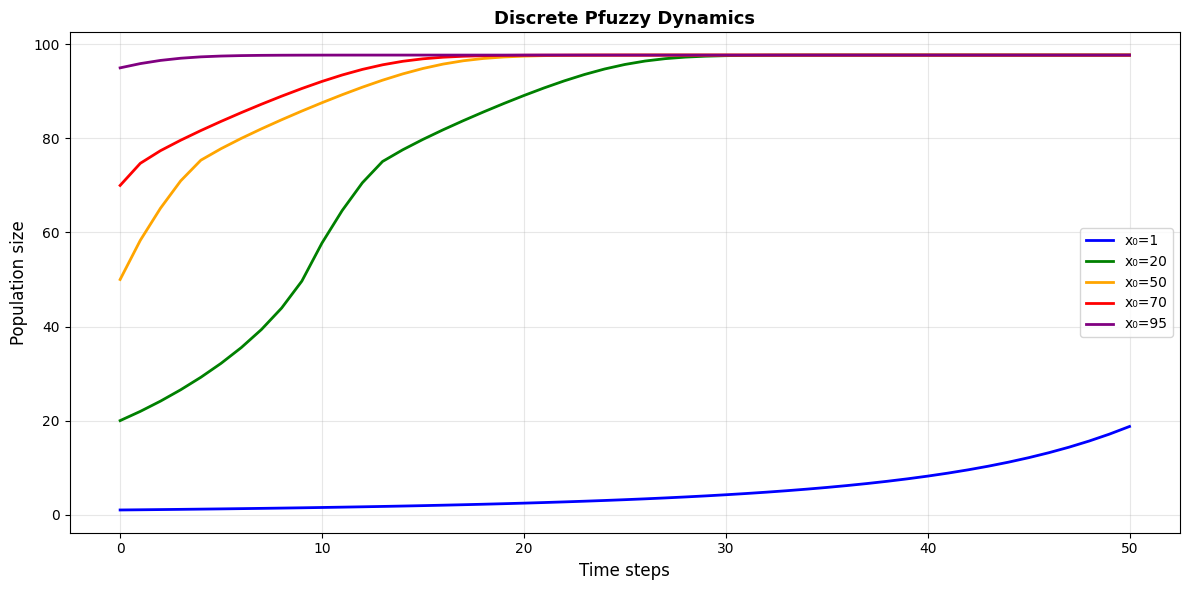

In [6]:
# Simulate with custom dynamics function in 'custom' mode
# This allows more complex interaction between state and fuzzy output
pfuzzy = PFuzzyDiscrete(fis=fis, dynamic_function=my_dynamics_discrete,mode='custom')

# several initial conditions
initial_conditions = [1, 20, 50, 70, 95]
colors = ['blue', 'green', 'orange', 'red', 'purple']

fig, ax = plt.subplots(figsize=(12, 6))

for x0, color in zip(initial_conditions, colors):
    t,traj = pfuzzy.simulate(x0={'population_size': x0}, n_steps=50)
    ax.plot(t, traj[:, 0], color=color, linewidth=2, label=f'x₀={x0}')

ax.set_xlabel('Time steps', fontsize=12)
ax.set_ylabel('Population size', fontsize=12)
ax.set_title('Discrete Pfuzzy Dynamics', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

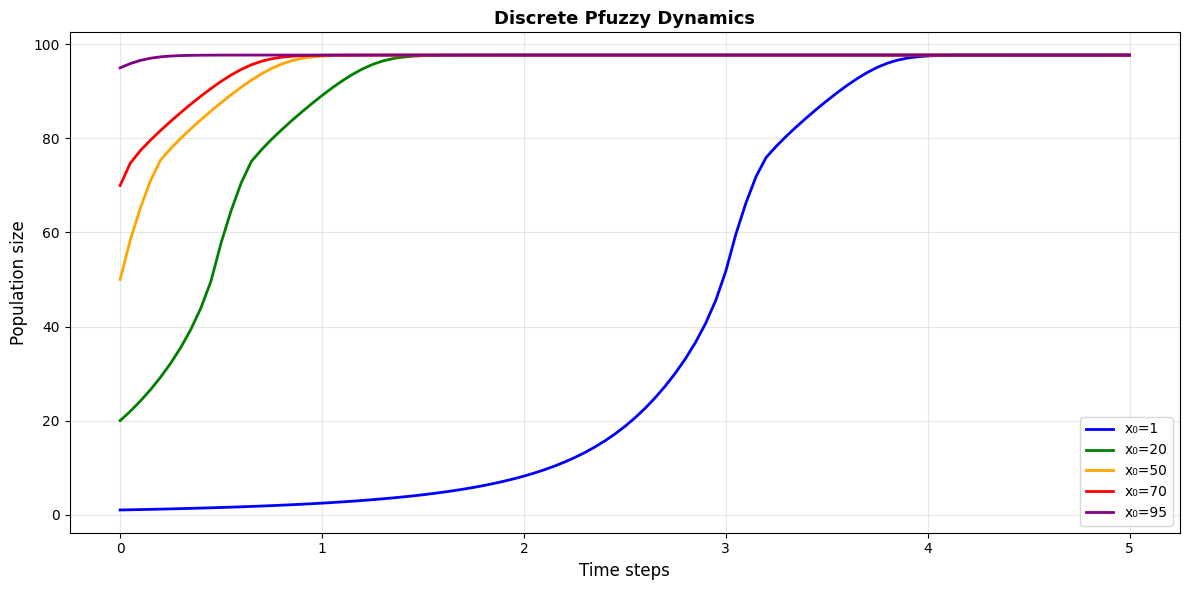

In [11]:
pfuzzy = PFuzzyContinuous(fis=fis, dynamic_function=my_dynamics_continuous,mode='custom')

# Diferentes condições iniciais
initial_conditions = [1, 20, 50, 70, 95]
colors = ['blue', 'green', 'orange', 'red', 'purple']

fig, ax = plt.subplots(figsize=(12, 6))

for x0, color in zip(initial_conditions, colors):
    t,traj = pfuzzy.simulate(x0={'population_size': x0},t_span=(0,5))
    ax.plot(t, traj[:, 0], color=color, linewidth=2, label=f'x₀={x0}')

ax.set_xlabel('Time steps', fontsize=12)
ax.set_ylabel('Population size', fontsize=12)
ax.set_title('Discrete Pfuzzy Dynamics', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()